**Step 1 : Upload File into Colab**
---

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student_data_processed.csv to student_data_processed (1).csv


**Step 2 : Train/Test Split**
---

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the processed dataset into a DataFrame
df_encoded = pd.read_csv("student_data_processed.csv")

# Split features and target (assuming target column is 'passed')
X = df_encoded.drop('passed', axis=1)
y = df_encoded['passed']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Step 3 : Train four Classifiers**
---

In [ ]:
# Import four different classification models from scikit-learn
from sklearn.tree import DecisionTreeClassifier                # Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier             # K-Nearest Neighbors Classifier
from sklearn.ensemble import RandomForestClassifier            # Random Forest Classifier (ensemble of decision trees)
from sklearn.linear_model import LogisticRegression            # Logistic Regression Classifier

# Initialize a Decision Tree with a maximum depth of 5 to limit overfitting
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Initialize KNN with 5 neighbors (default distance-based voting)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize Random Forest with 100 trees and a fixed random state for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Logistic Regression with increased max_iter to ensure convergence
lr_model = LogisticRegression(max_iter=1000)

# Train the Decision Tree model on the training data
dt_model.fit(X_train, y_train)

# Train the K-Nearest Neighbors model
knn_model.fit(X_train, y_train)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Train the Logistic Regression model
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**Step 4 : Predictions on the test set**
---

In [ ]:
y_pred_dt = dt_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

**Step 5 : Evaluate all four models**
---

📌 Decision Tree Evaluation
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
Confusion Matrix:
 [[26  0]
 [ 0 53]]

📌 KNN Evaluation
Accuracy : 0.95
Precision: 0.96
Recall   : 0.96
F1 Score : 0.96
Confusion Matrix:
 [[24  2]
 [ 2 51]]

📌 Random Forest Evaluation
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
Confusion Matrix:
 [[26  0]
 [ 0 53]]

📌 Logistic Regression Evaluation
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
Confusion Matrix:
 [[26  0]
 [ 0 53]]



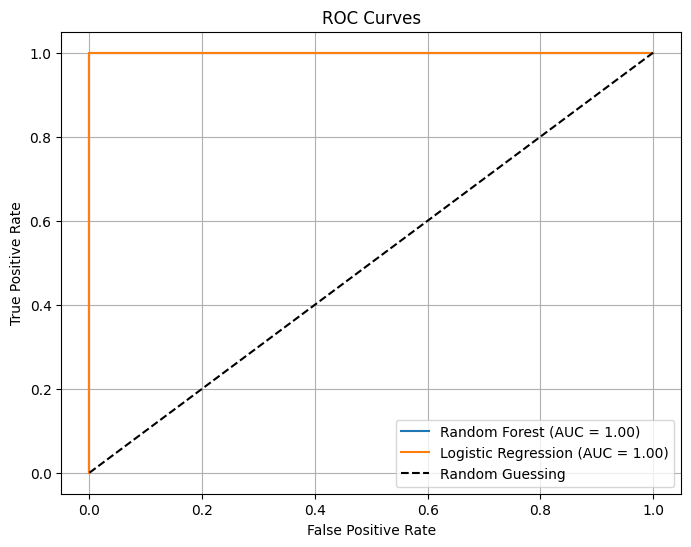

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


def evaluate_model(name, y_true, y_pred):
    print(f"📌 {name} Evaluation")
    print("Accuracy :", round(accuracy_score(y_true, y_pred), 2))
    print("Precision:", round(precision_score(y_true, y_pred), 2))
    print("Recall   :", round(recall_score(y_true, y_pred), 2))
    print("F1 Score :", round(f1_score(y_true, y_pred), 2))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("")

evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Logistic Regression", y_test, y_pred_lr)

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# For Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# For Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)

auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid()
plt.show()